In [12]:
import heapq
import csv
import networkx as nx
import matplotlib.pyplot as plt

file = './dataset/edge.csv' 
def dijkstra(graph, start, end):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    
    priority_queue = [(0, start)]
    
    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)
        
        if current_distance > distances[current_vertex]:
            continue

        if current_vertex == end:
            break
        
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight
            
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
    
    return distances[end]

def convertCsvToNodes():
    graph = {}
    with open(file, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        
        for row in reader:
            place1 = row["place1"]
            mi_to_place = float(row["mi_to_place"])*1.609
            place2 = row["place2"]
            
            if place1 not in graph:
                graph[place1] = {}
            if place2 not in graph:
                graph[place2] = {}
            
            graph[place1][place2] = float(mi_to_place)
            graph[place2][place1] = float(mi_to_place)
    return graph

def findRowNames(start,end):
    ct = 0
    startNodeData = []
    endNodeData = []
    with open('./dataset/identifiers.csv', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['place'] == start:
                startNodeData = row
            if row['place'] == end:
                endNodeData = row
            if(len(startNodeData) > 0 and len(endNodeData) > 0):
                break


    return startNodeData, endNodeData

graph = convertCsvToNodes()

start = '00124'
end = '35800'
shortest_distance = dijkstra(graph, start, end)

G = nx.Graph()

placeStart , placeEnd = findRowNames(start, end)

if shortest_distance == float('infinity'):
    print(f"Não há caminho de {start} para {end}")
else:
    print(f"A distância mais curta do estado {placeStart['statename']} da cidade {placeStart['placename']} para estado {placeEnd['statename']} da cidade {placeEnd['placename']} é {round(shortest_distance, 2) } km")

A distância mais curta do estado Alabama da cidade Abbeville city para estado Alabama da cidade Homewood city é 224.91 km


### O objetivo é gerar o menor caminho e imprimir no gráfico abaixo (:


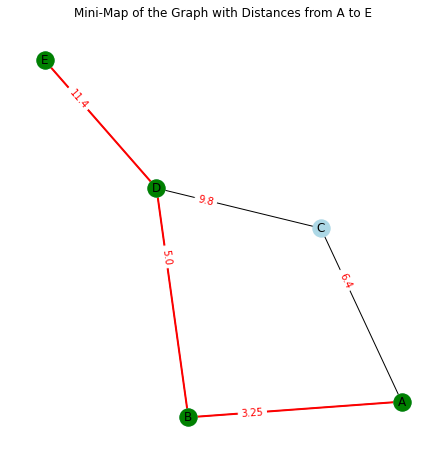

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph with distances
G = nx.Graph()
G.add_edge('A', 'B', weight=3.25)
G.add_edge('A', 'C', weight=6.4)
G.add_edge('B', 'D', weight=5.0)
G.add_edge('C', 'D', weight=9.8)
G.add_edge('D', 'E', weight=11.4)

# Specify the initial and final nodes
initial_node = 'A'
final_node = 'E'

# Compute the shortest path
shortest_path = nx.shortest_path(G, source=initial_node, target=final_node, weight='weight')

# Create a mini-map with distances using NetworkX and Matplotlib
pos = nx.spring_layout(G, seed=42)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

plt.figure(figsize=(6, 6))
nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue')

# Draw the nodes in the shortest path with a different color
shortest_path_nodes = set(shortest_path)
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path_nodes, node_color='green', node_size=300)

# Draw the edges in the shortest path with a different color
shortest_path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='red', width=2)

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3, font_size=10, font_color='red')
plt.title(f"Mini-Map of the Graph with Distances from {initial_node} to {final_node}")
plt.show()